<a href="https://colab.research.google.com/github/ama1a005/CNN/blob/main/CNN_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.layers import Flatten,Dense,Dropout
from tensorflow.keras.models import Model

Custom CNN

In [ ]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


(50000, 32, 32, 3)

In [ ]:
y_train = y_train.reshape(-1,)   # coverting nested array to 1D array
y_test = y_test.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(x,y,index):
  plt.figure(figsize=(15,2))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

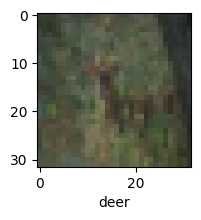

In [ ]:
plot_sample(X_train,y_train,10)

In [ ]:
X_train = X_train/255   #normalisting the pixel values
X_test = X_test/255

In [ ]:
cnn = models.Sequential([


                         layers.Conv2D(filters=32,kernel_size=(3,3),activation ='relu',input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),

                         layers.Conv2D(filters=64,kernel_size=(3,3),activation ='relu'),
                         layers.MaxPooling2D((2,2)),

                         layers.Flatten(),
                         layers.Dense(64,activation='relu'),
                         layers.Dense(10,activation='softmax')

])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 47ms/step - accuracy: 0.3707 - loss: 1.7179
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.5784 - loss: 1.1874
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 110s 43ms/step - accuracy: 0.6360 - loss: 1.0342
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 42ms/step - accuracy: 0.6717 - loss: 0.9416
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 100s 54ms/step - accuracy: 0.6974 - loss: 0.8738


In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step


array([[7.9441285e-03, 4.0959390e-03, 1.5351285e-02, 4.2366517e-01,
        3.1686071e-03, 1.2815209e-01, 1.4642479e-01, 5.8059119e-05,
        2.6422775e-01, 6.9120359e-03],
       [2.2364471e-02, 6.1051714e-01, 7.6974531e-05, 9.7490920e-06,
        2.5917507e-06, 1.1920858e-07, 3.3638713e-07, 1.0735630e-06,
        3.6105359e-01, 5.9739058e-03],
       [2.2259600e-01, 2.8780055e-01, 2.6997305e-03, 2.6821194e-03,
        1.2907286e-03, 1.2107663e-04, 1.9210407e-04, 2.9218046e-04,
        4.3362331e-01, 4.8702277e-02],
       [8.9825684e-01, 3.6788229e-02, 2.0823780e-02, 3.4644741e-03,
        3.3107288e-03, 6.5865694e-05, 8.1517743e-03, 5.5570679e-05,
        2.5523284e-02, 3.5593943e-03],
       [8.8169669e-05, 2.3583445e-04, 4.7384828e-02, 6.1059091e-02,
        4.4757703e-01, 2.0645272e-02, 4.2205402e-01, 3.6717116e-04,
        5.2786898e-04, 6.0732171e-05]], dtype=float32)

Checking whether the samples predicted by the model is correct.

In [ ]:
y_classes_by_model =[np.argmax(element) for element in y_pred]
y_classes_by_model[:5]

[3, 1, 8, 0, 4]

In [ ]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

Three out of first five samples have been correctly predicted by the model

In [ ]:
from sklearn.metrics import classification_report
print("Classification report: \n",classification_report(y_test,y_classes_by_model))


Classification report: 
               precision    recall  f1-score   support

           0       0.69      0.78      0.73      1000
           1       0.73      0.85      0.79      1000
           2       0.60      0.54      0.57      1000
           3       0.61      0.36      0.45      1000
           4       0.64      0.60      0.62      1000
           5       0.57      0.64      0.61      1000
           6       0.73      0.79      0.76      1000
           7       0.69      0.77      0.73      1000
           8       0.77      0.80      0.78      1000
           9       0.79      0.71      0.75      1000

    accuracy                           0.68     10000
   macro avg       0.68      0.68      0.68     10000
weighted avg       0.68      0.68      0.68     10000



In [ ]:
cnn.save('custom_cnn.h5')

PRETRAINED MODEL FOR TRANSFER LEARNING

In [ ]:
base_model = tf.keras.applications.VGG16(input_shape=(32,32,3),include_top=False,weights='imagenet')  #removing the top layer since it only needs to classify w.r.t 10 classes

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False     #to prevent retraining

In [ ]:
x = Flatten()(base_model.output) #flatten the 4D vector into 1D to feed into the dense layer
x = Dense(128 , activation='relu')(x)
x = Dropout(0.5)(x)   #to prevent overfitting
x = Dense(10 , activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=x)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 786s 503ms/step - accuracy: 0.5600 - loss: 1.2560 - val_accuracy: 0.5874 - val_loss: 1.1938
Epoch 2/5
 763/1563 ━━━━━━━━━━━━━━━━━━━━ 5:37 422ms/step - accuracy: 0.5669 - loss: 1.2397

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")

In [28]:
y_pred = model.predict(X_test)
print(y_pred[:5])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
[[1.74370967e-02 9.17638093e-02 2.01100856e-02 4.36797798e-01
  4.43394333e-02 1.07909590e-01 1.43513009e-01 7.00513972e-03
  6.02778941e-02 7.08462149e-02]
 [4.99042459e-02 1.05280109e-01 3.06559465e-04 4.97967594e-05
  3.34561046e-05 2.87186754e-06 4.05885976e-06 1.10697920e-05
  8.12375426e-01 3.20324712e-02]
 [3.87461111e-02 4.03105542e-02 1.61842990e-03 2.70172092e-03
  1.73997749e-02 5.86647424e-04 1.32253590e-05 2.51818239e-03
  7.83037007e-01 1.13068365e-01]
 [7.43461922e-02 2.21671179e-01 7.10508600e-03 7.40090339e-03
  2.15321430e-03 7.47556915e-04 4.27787134e-04 1.29187619e-03
  3.90646905e-01 2.94209331e-01]
 [9.42564511e-05 8.51521054e-06 5.77702112e-02 1.34333121e-02
  1.32158194e-02 1.64921710e-03 9.13749695e-01 2.86070626e-05
  4.45960941e-05 5.78336994e-06]]


In [29]:
y_classes_by_model =[np.argmax(element) for element in y_pred]
y_classes_by_model[:5]

[3, 8, 8, 8, 6]

In [30]:
y_test[:5]      # four out first five samples from the test set has been correctly predicted by the pre trained model

array([3, 8, 8, 0, 6], dtype=uint8)

In [31]:
model.save('pretrained_model.h5')

Comparison of results

In [32]:
custom_loss, custom_accuracy = cnn.evaluate(X_test, y_test, verbose=0)
print(f'Custom Model Accuracy: {custom_accuracy:.4f}')

# Evaluate pre-trained model
pretrained_loss, pretrained_accuracy =model.evaluate(X_test, y_test, verbose=0)
print(f'Pre-trained Model Accuracy: {pretrained_accuracy:.4f}')

Custom Model Accuracy: 0.6999
Pre-trained Model Accuracy: 0.5995
